<a href="https://colab.research.google.com/github/akashkivani/almabetter-Online-Retail-Customer-Segmentation-Project/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Extraction/identification of major topics & themes discussed in news articles.**

**Problem Description**
In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# **Data Description**

**Attribute Information:**

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

0. Importing libs and data.

---



In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
df = pd.read_excel('/content/drive/MyDrive/Data Science/AlmaBetter School/Capstone/Project 4/Data/Online Retail.xlsx')

Initial Data exploration

In [45]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [46]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [47]:
df.shape

(541909, 8)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [49]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

The missing data can not with replaced with mean, median or mode, thus deciding to drop the rows ith missing values. As less than 50% of value is missing from column, thus not droppingf the column instead dropping the row. 

In [50]:
df.dropna(axis = 0 , inplace = True)

In [51]:
df.shape

(406829, 8)

In [52]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

No null value remains.

Descriptive Statistics:

---



In [53]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


# 1. **Feature engineering.**

---



In [54]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

a. **Date time Stripping**

We already have InvoiceDate as datetime object. I am stripping them into year, month, day, hours to have a better analysis of costomer. 

In [55]:
df['Invoice_Year'] = df['InvoiceDate'].dt.year
df['Invoice_Month'] = df['InvoiceDate'].dt.strftime('%B') 
df['Invoice_Day'] = df['InvoiceDate'].dt.strftime('%A') 
df['Invoice_Hour'] = df['InvoiceDate'].dt.hour

#Printing data frame
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8


b. **Total amount**

Although I do have column on quantity and unit price, it is also important to understand the total amount spend by costomer. We can get that by multiplying unit price and quantity. 

In [56]:
df['Total_Amount'] = df['Quantity']*df['UnitPrice']

#printing new data frame
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_Hour,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34


In [57]:
df.shape

(406829, 13)

I have created 5 additional column. 

# 2. **EXPLORATORY DATA ANALYSIS**

---



My analysis in this section will contain columns containing numerical data. 

In [58]:
num_features= list(df.select_dtypes(['int64','float64']))

In [59]:
num_features

['Quantity',
 'UnitPrice',
 'CustomerID',
 'Invoice_Year',
 'Invoice_Hour',
 'Total_Amount']

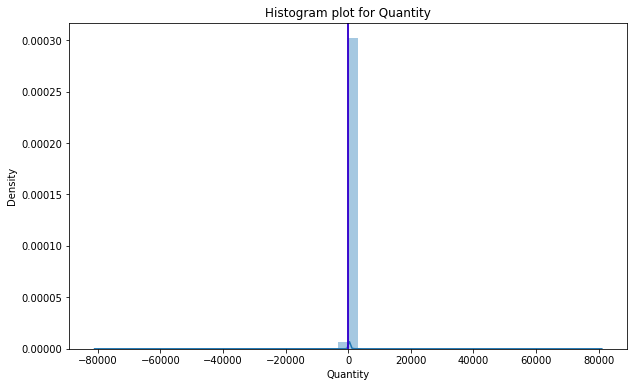

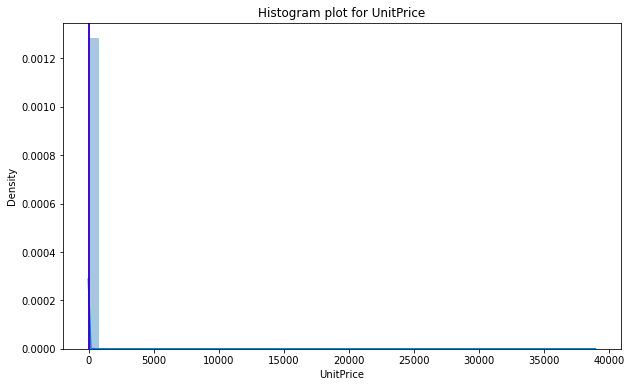

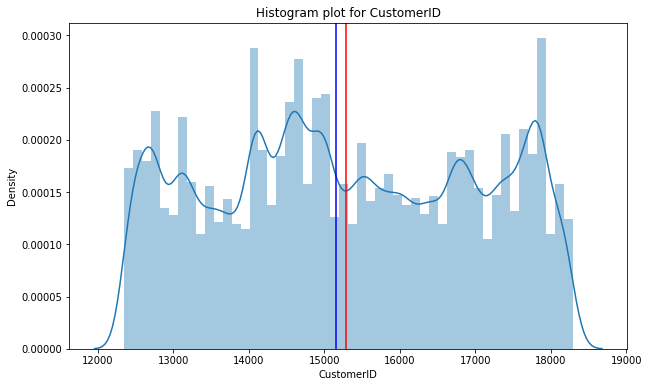

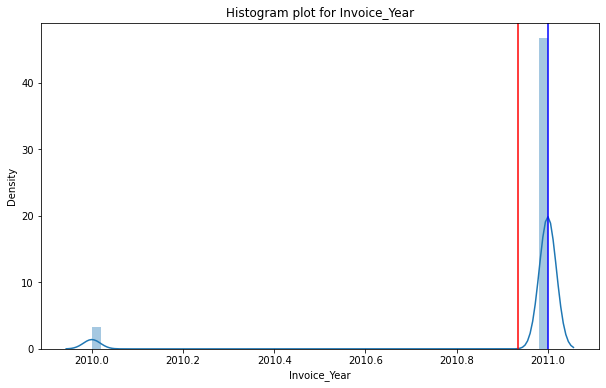

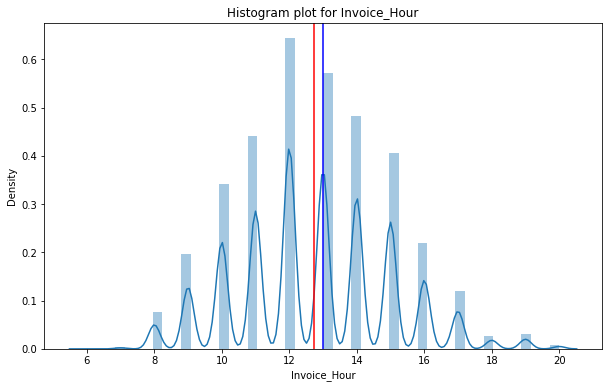

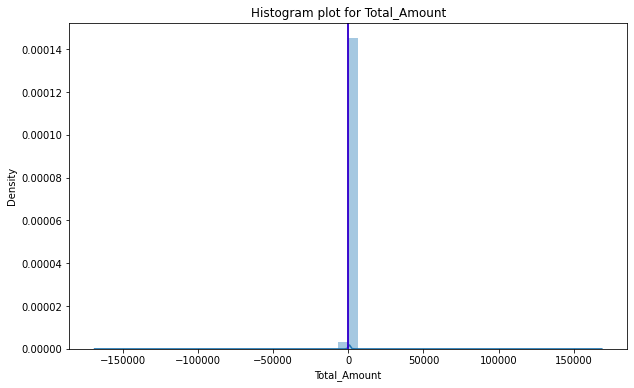

In [60]:
for col in num_features:
  fig = plt.figure(figsize = (10,6))
  ax = fig.gca()
  sns.distplot(df[col])
  feature = df[col]
  ax.axvline(feature.mean(), color= 'red')
  ax.axvline(feature.median(), color= 'Blue')
  ax.set_title(f'Histogram plot for {col}')

  plt.show()

**Top countries**

Countries relative to cosumer number. 

In [62]:
top_countries = pd.DataFrame(df['Country'].value_counts().sort_values(ascending = False).reset_index())
top_countries['Country cx %'] = top_countries['Country']*100/top_countries['Country'].count()
top_countries.rename(columns = {'index' : 'country','country':'Count of costomers'} , inplace = True)
top_countries.head(5)

,country,Country,Country cx %
0,United Kingdom,361878,978048.648649
1,Germany,9495,25662.162162
2,France,8491,22948.648649
3,EIRE,7485,20229.729730
4,Spain,2533,6845.945946


In [63]:
top_countries = pd.DataFrame(df['Country'].value_counts().sort_values(ascending = False).reset_index())
top_countries['Country %']= top_countries['Country']*100/df['Country'].count()
top_countries.rename(columns = {'index':'Country','Country':'Total Counts'},inplace = True)
top_countries.head(5)

,Country,Total Counts,Country %
0,United Kingdom,361878,88.950886
1,Germany,9495,2.333904
2,France,8491,2.087118
3,EIRE,7485,1.839839
4,Spain,2533,0.622620


Uk have the highest consumption, let's add a column to see the % of consumption. Also, changing column name. 

Text(0.5, 1.0, 'Country vs counts of CX')

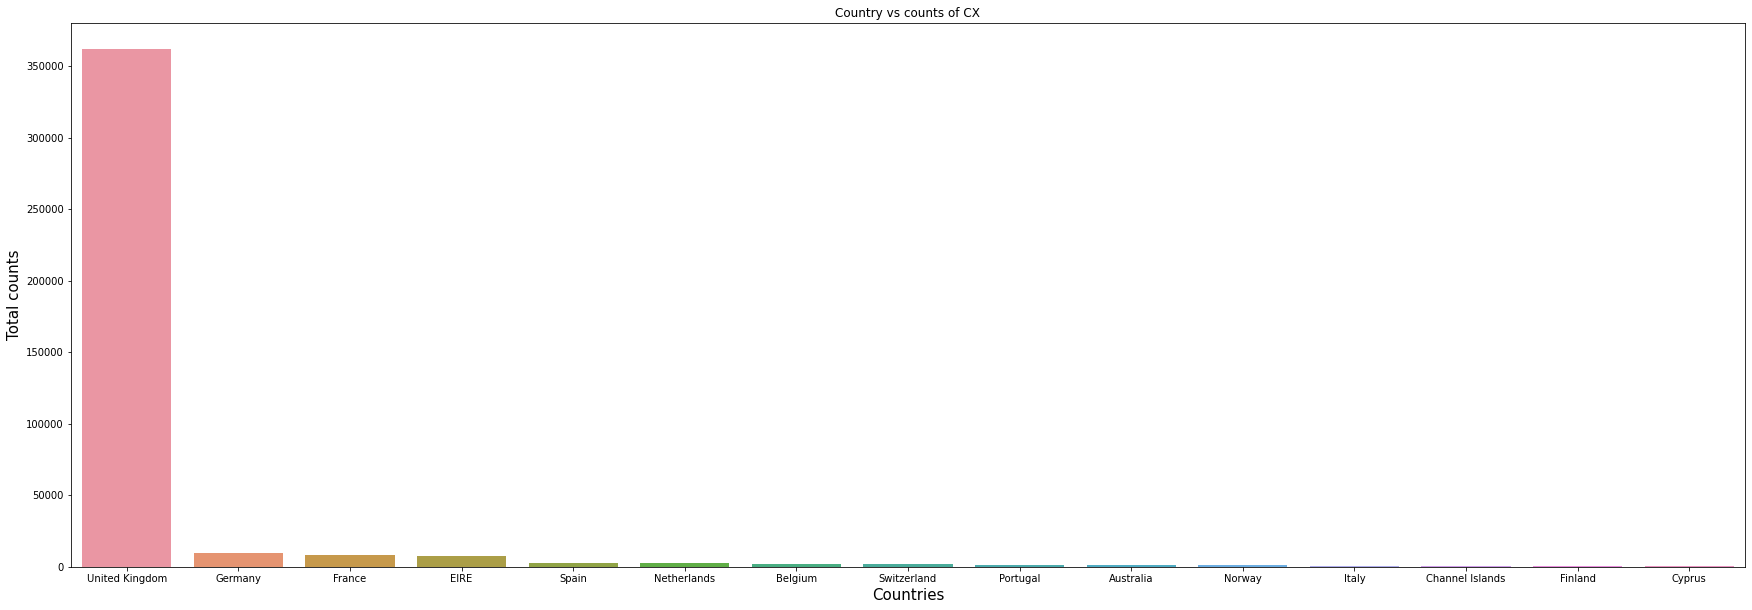

In [67]:
plt.figure(figsize= (30,10))
sns.barplot(x = 'Country' , y = 'Total Counts' , data = top_countries[:15]) #Setting it will 15 only as there are may country with very small counts. 
plt.xlabel('Countries' , size = 15)
plt.ylabel('Total counts' , size  = 15)
plt.title('Country vs counts of CX')